In [3]:
!pip install opendatasets


In [4]:
import opendatasets as op
op.download("https://www.kaggle.com/datasets/kaustubhb999/tomatoleaf")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: prustysitikantha
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/kaustubhb999/tomatoleaf


100%|██████████| 179M/179M [00:00<00:00, 1.37GB/s]

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input




In [6]:
conv_base=VGG16(weights='imagenet',include_top=False,input_shape=(224,224,3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [7]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
conv_base.trainable=True
set_trainable=False
for layer in conv_base.layers:
  if layer.name=='block5_conv1':
    set_trainable=True
  if set_trainable:
    layer.trainable=True
  else:
    layer.trainable=False

In [9]:
for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_layer False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [10]:
model=Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(10,activation='softmax'))

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
)
test_datagen=ImageDataGenerator(
    rescale=1./255
)

In [12]:
train_generator=train_datagen.flow_from_directory(
    '/content/tomatoleaf/tomato/train',
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)
test_generator=test_datagen.flow_from_directory(
    '/content/tomatoleaf/tomato/val',
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical'
)

Found 10000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [13]:
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=2e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [14]:
history=model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 180s 504ms/step - accuracy: 0.4580 - loss: 1.5609 - val_accuracy: 0.7180 - val_loss: 0.9061
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 140s 447ms/step - accuracy: 0.7117 - loss: 0.8687 - val_accuracy: 0.7820 - val_loss: 0.6266
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 139s 444ms/step - accuracy: 0.7914 - loss: 0.6243 - val_accuracy: 0.8390 - val_loss: 0.5095
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 139s 444ms/step - accuracy: 0.8397 - loss: 0.4970 - val_accuracy: 0.8610 - val_loss: 0.4170
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 141s 450ms/step - accuracy: 0.8669 - loss: 0.4114 - val_accuracy: 0.8460 - val_loss: 0.4729
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 145s 464ms/step - accuracy: 0.8958 - loss: 0.3283 - val_accuracy: 0.8970 - val_loss: 0.3269
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 134s 427ms/step - accuracy: 0.9078 - loss: 0.2896 - val_accuracy: 0.8950 - val_loss: 0.3406
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 135s 429ms/step - accuracy: 0.9199 -

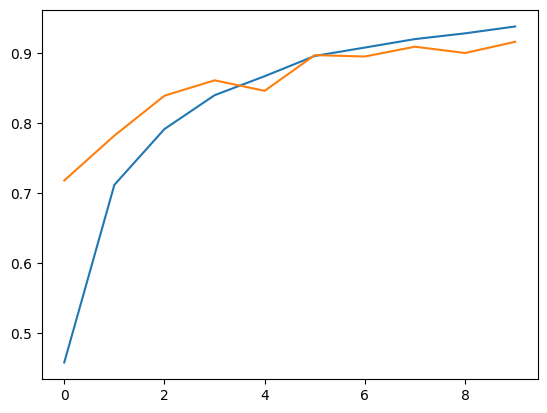

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

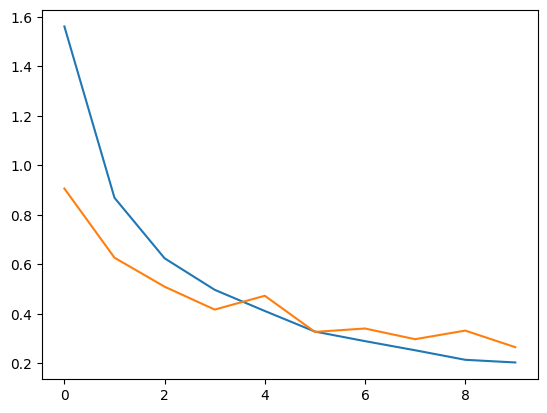

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [17]:
# from tensorflow.keras.preprocessing import image
# import numpy as np

# img_path="/content/original.jpg"
# img=image.load_img(img_path,target_size=(224,224))
# img=image.img_to_array(img)
# img=np.expand_dims(img,axis=0)
# img=img/255.0

In [18]:
# pred = model.predict(img)
# predicted_class_index = np.argmax(pred[0])
# confidence = np.max(pred[0])

# # Get class labels from the train_generator
# class_labels = list(train_generator.class_indices.keys())
# predicted_class_label = class_labels[predicted_class_index]

# print(f"The predicted class for {img_path} is: {predicted_class_label} with a confidence of {confidence:.2f}")

In [19]:
# import pickle
# pickle_path="model.pkl"
# with open(pickle_path,'wb') as file:
#   pickle.dump(model,file)

In [20]:
    model.save('model.h5') # This is better than pickle for Deep Learning

In [22]:
model.save('model.keras')